In [1]:
import numpy as np
import matplotlib.pyplot as plt

### importance sampling
importance sampling is an alghoritm used to compute expectation values $\phi(x)$ from a given distribution $p(x)$, often called "target distribution" in the case in which:

1. we can't sample directly from $p$;
2. given a certain realisation $x^{(i)}$ of the random variable $X$, we can compute $p[x^{(i)}]$

the idea is to sample from a so called sampler distribution $q(x)$, a distribution from which is "easy to sample" and compute the target distribution in those points; since $q(x)$ is not the correct distribution, some of the realisation will be under-represented, some over-represented; to get around that problem, "weights" $w$ are intoduced, to express the extimator of $\phi$ as follows:
$$
    w_i = \frac{p[x^{(i)}]}{q[x^{(i)}]} \ \rightarrow \ \braket{\phi} = \frac{\sum_i w^{(i)} \phi^{(i)}}{\sum_i w^{(i)}}
$$
in this example this method is applied in the calculation of the mean $\mu$ of a target cauchy distribution using both a uniform and a gaussian sampler; we recall the cauchy pdf:
$$
    f(x, \mu, \gamma) = \frac{1}{\pi}\bigg[ \frac{\gamma}{(x-\mu)^2-\gamma^2}\bigg]
$$

In [42]:
upperLimit = 5 #upper limit of the sampler function
lowerLimit = -5 #lower limit
sampleN = 50000 #number of samples

muTarget = 0 #mean of the target
gammaTarget = 1 #gamma of the target
muSampler = 0 #mean of the sampler
sigmaSampler = 3 #gamma of the sampler

#target pdf (cauchy)
def cauchyPdf(x):
    return (1/np.pi) * (gammaTarget/((x-muTarget)**2 + gammaTarget**2))

#gaussian sampler
def gauss(x, sigma, mu):
    return 1/(2*np.pi*sigma**2)**(1/2) * np.exp(-((x-mu)**2)/(2*sigma**2)) 

#uniform sampler
sampler = np.full(sampleN, 1/(upperLimit - lowerLimit))

x = np.linspace(lowerLimit, upperLimit, sampleN)
target = cauchyPdf(x) #target distribution
gaussSampler = gauss(x, sigmaSampler, muSampler) #gaussian sampler

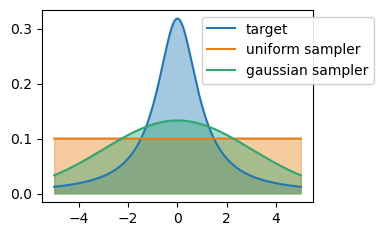

In [43]:
fig = plt.figure(figsize=(3.5,2.5))
plt.plot(x, target, label='target')
plt.fill_between(x, target, alpha=0.4)
plt.plot(x, sampler, label='uniform sampler', color='#E97E13')
plt.fill_between(x, sampler, alpha=0.4, color='#E97E13')
plt.plot(x, gaussSampler, label='gaussian sampler', color='#31A772')
plt.fill_between(x, gaussSampler, alpha=0.4, color='#31A772')
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1), fancybox=True, framealpha=.9)
plt.show()

the mean of the target is computes using the method described above, updating the result at each step, i.e. for each new sample taken;

In [48]:
steps = np.arange(0, sampleN) #array of the sampling steps

xUni = np.zeros(sampleN)
wUni = np.zeros(sampleN)
xGauss = np.zeros(sampleN)
wGauss = np.zeros(sampleN)

for i in range(sampleN):
    xUni[i] = np.random.uniform(lowerLimit, upperLimit) #uniform sampling
    wUni[i] = cauchyPdf(xUni[i]) / sampler[i] #weights of the uniform sampling
    xGauss[i] = np.random.normal(muSampler, sigmaSampler) #gaussian sampling
    wGauss[i] = cauchyPdf(xGauss[i]) / gauss(xGauss[i], sigmaSampler, muSampler) #weights of the gaussian sampling

#calculation of the target mean with the uniform sampling
fUni = [(np.sum(xUni[:i] * wUni[:i])) / (np.sum(wUni[:i])) for i in range(1, len(xUni) + 1)]    

#calulation of the target mean with the gaussian sampling
fGauss = [(np.sum(xGauss[:i] * wGauss[:i])) / (np.sum(wGauss[:i])) for i in range(1, len(xGauss) + 1)] 

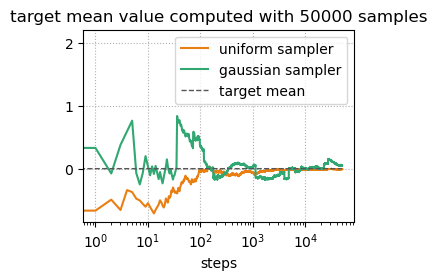

In [49]:
mean = np.full(sampleN, muTarget)
fig = plt.figure(figsize=(3.5,2.5))
plt.plot(steps, fUni, label='uniform sampler', color='#E97E13', linewidth=1.5)
plt.plot(steps, fGauss, label='gaussian sampler', color='#31A772', linewidth=1.5)
plt.plot(steps, mean, label='target mean', linestyle='dashed', linewidth=1, color='#555555')
plt.xlabel('steps')
#plt.ylim(-2, 2)
plt.title(f'target mean value computed with {sampleN} samples')

plt.xscale('log')
plt.legend()
plt.grid(linestyle='dotted')
plt.show()

finally, the same experiment is repeated a large number of times (5000) by taking 1000 sample each time; the target mean is computed using both uniform and gaussian sampler after 1000 samples for each experiment; the distributions of the computed means are plotted; what we notice is that the mean is gaussian-like distributed, and that the uniform sampler appears to be more accurate.

In [50]:
experiments = np.arange(5000) #number of time we repeat the experiment
sampleN2 = 1000 #number of samples
sampler2 = np.full(sampleN2, 1/(upperLimit - lowerLimit))

steps = np.arange(0, sampleN2)

xUni2 = np.zeros(sampleN2)
wUni2 = np.zeros(sampleN2)
xGauss2 = np.zeros(sampleN2)
wGauss2 = np.zeros(sampleN2)
fUniList = []
fGaussList = []

for j in enumerate(experiments):
    for i in range(sampleN2):
        xUni2[i] = np.random.uniform(lowerLimit, upperLimit)
        wUni2[i] = cauchyPdf(xUni2[i]) / sampler2[i]
        xGauss2[i] = np.random.normal(muSampler, sigmaSampler)
        wGauss2[i] = cauchyPdf(xGauss2[i]) / gauss(xGauss2[i], sigmaSampler, muSampler)

    fUni2 = (np.sum(xUni2[:i] * wUni2[:i])) / (np.sum(wUni2[:i]))     
    fUniList.append(fUni2)
    fGauss2 = (np.sum(xGauss2[:i] * wGauss2[:i])) / (np.sum(wGauss2[:i]))     
    fGaussList.append(fGauss2)

fUniArray = np.array(fUniList)
fGaussArray = np.array(fGaussList)

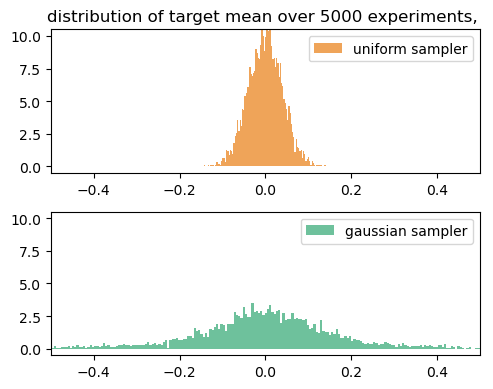

In [55]:
fig = plt.figure(figsize=(5, 4), facecolor=(1,1,1))
grid = plt.GridSpec(2, 1, height_ratios=[1, 1])

ax1 = fig.add_subplot(grid[0, 0])  
plt.hist(fUniArray, density=True, bins=100, color='#E97E13', alpha=0.7, label='uniform sampler')
ax1.set_title(f'distribution of target mean over {len(experiments)} experiments, ')
plt.legend(loc='upper right')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 10.5)

ax2 = fig.add_subplot(grid[1, 0])  
plt.hist(fGaussArray, density=True, bins=5000, color='#31A772', alpha=0.7, label='gaussian sampler')
plt.legend(loc='upper right')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 10.5)

plt.tight_layout()